In [154]:
import pandas as pd
import numpy as np
import numpy.random as nr
import datetime as dt
import random
from pydomo import Domo
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import time

from fbprophet import Prophet                   #Prophet
#from neuralprophet import NeuralProphet         #NeuralProphet
from sklearn.metrics import mean_absolute_error #評価指標MAE
from statistics import mean  

from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, num2date
from matplotlib.ticker import FuncFormatter

from faker import Faker
import sys

SyntaxError: invalid syntax (<ipython-input-2-ec04bdf5ec78>, line 1)

In [155]:
pd.set_option('display.max_rows',2000)

In [156]:
datagenerator = Faker()

In [157]:
#Area_List = ["D-A","D-B","D-C","D-D","D-E","D-F","D-G","D-H","D-I","D-K","D-L","D-M","D-O","UPP"]
Area_List = ["D-A","D-B","D-C","D-D","D-E"]
#Area_List = ["D-A"]

Order_Lot_List = [100,200,300]
Shipping_Lot_List = [100,200,300]

Weight_List = [3000,4000,5000]
Length_List = [100,300,500]
Width_List = [100,300,500]
Depth_List = [100,300,500]

Purchase_Price_List = [10000,40000,20000]
GP_Ratio = 0.015

Initial_Amount_List = [7000,8000,10000]
Basic_Stock_List = [8000,10000]
Annual_Sales_Plan_List = [100000,200000,300000]

Arrival_Leadtime_List = [1,2,3]
Shipment_Leadtime_List = [3,5,7]
Order_Received_Interval_List = [3,5,10]
Order_Interval_List = [1,2,3]
Picking_Unit_List = [100,200,300]
Route_List = [1,2,3]

Number_of_Supplier = 10
Supplier_List = []
Supplier_dict_Address = {}
for n in range(Number_of_Supplier):
    Supplier_List.append(datagenerator.company())
for i in range(Number_of_Supplier):
    Supplier_dict_Address[Supplier_List[i]] = datagenerator.address()

Number_of_Customer = 5
Customer_dict_Route = {}
Customer_dict_Address = {}
Customer_List = []
for n in range(Number_of_Customer):
    Customer_List.append(datagenerator.company())
for i in range(Number_of_Customer):
    Customer_dict_Route[Customer_List[i]] = random.sample(Route_List, k=1)[0]
for i in range(Number_of_Customer):
    Customer_dict_Address[Customer_List[i]] = datagenerator.address()

Route_Master = pd.read_csv('SCDOS_Route_Master.csv')

Area_Size_Vertical = 2
Area_Size_Horizonal = 2
Rack_Size_Vertical = 3
Rack_Size_Horizonal = 3

In [158]:
column_Product_Master = ["Product_ID","Product_Number","Area","Supplier","Supplier_Address","Order_Lot","Shipping_Lot","Weight","Length","Width","Depth","Purchase_Price","Selling_Price","Initial_Amount","Basic_Stock","Annual_Sales_Plan","Arrival_Leadtime","Shipment_Leadtime","Order_Received_Interval","Order_Interval","Picking_Unit"]
Product_Master = pd.DataFrame(columns = column_Product_Master)

for i in range(len(Area_List)):
    for j in range(Area_Size_Vertical):
        for n in range(Area_Size_Horizonal):
            for l in range(Rack_Size_Vertical):
                for m in range(Rack_Size_Horizonal):
                    ind_master = i * Area_Size_Vertical*Area_Size_Horizonal*Rack_Size_Vertical*Rack_Size_Horizonal + j*Area_Size_Horizonal*Rack_Size_Vertical*Rack_Size_Horizonal + n*Rack_Size_Vertical*Rack_Size_Horizonal + l*Rack_Size_Horizonal + m
                    Product_Master.loc[ind_master,"Product_ID"] = ind_master + 1
                    Product_Master.loc[ind_master,"Product_Number"] =(Area_List[i]+str(j+1)+str(n+1)+str(l+1)+str(m+1))
                    Product_Master.loc[ind_master,"Area"] =Area_List[i]
                    Product_Master.loc[ind_master,"Supplier"] = random.sample(Supplier_List, k=1)[0]
                    Product_Master.loc[ind_master,"Supplier_Address"] = Supplier_dict_Address[Product_Master.loc[ind_master,"Supplier"]]
                    Product_Master.loc[ind_master,"Order_Lot"] = random.sample(Order_Lot_List, k=1)[0]
                    Product_Master.loc[ind_master,"Shipping_Lot"] = random.sample(Shipping_Lot_List, k=1)[0]
                    Product_Master.loc[ind_master,"Weight"] = random.sample(Weight_List, k=1)[0]
                    Product_Master.loc[ind_master,"Length"] = random.sample(Length_List, k=1)[0]
                    Product_Master.loc[ind_master,"Width"] = random.sample(Width_List, k=1)[0]
                    Product_Master.loc[ind_master,"Depth"] = random.sample(Depth_List, k=1)[0]
                    Product_Master.loc[ind_master,"Purchase_Price"] = random.sample(Purchase_Price_List, k=1)[0]
                    Product_Master.loc[ind_master,"Selling_Price"] = (1+GP_Ratio)*Product_Master.loc[ind_master,"Purchase_Price"]
                    Product_Master.loc[ind_master,"Initial_Amount"] = random.sample(Initial_Amount_List, k=1)[0]
                    Product_Master.loc[ind_master,"Basic_Stock"] = random.sample(Basic_Stock_List, k=1)[0]
                    Product_Master.loc[ind_master,"Annual_Sales_Plan"] = random.sample(Annual_Sales_Plan_List, k=1)[0]
                    Product_Master.loc[ind_master,"Arrival_Leadtime"] = random.sample(Arrival_Leadtime_List, k=1)[0]
                    Product_Master.loc[ind_master,"Shipment_Leadtime"] = random.sample(Shipment_Leadtime_List, k=1)[0]
                    Product_Master.loc[ind_master,"Order_Received_Interval"] = random.sample(Order_Received_Interval_List, k=1)[0]
                    Product_Master.loc[ind_master,"Order_Interval"] = random.sample(Order_Interval_List, k=1)[0]
                    Product_Master.loc[ind_master,"Picking_Unit"] = random.sample(Picking_Unit_List, k=1)[0]

Number_of_Product = len(Product_Master)

In [159]:
#Product_Master = pd.read_csv('SCDOS_Product_Master.csv')

In [160]:
Product_Master.to_csv("SCDOS_Product_Master.csv", encoding="utf-8",index = False)

In [161]:
Days_Range = 90
Start_Date = dt.date.today()-dt.timedelta(days = Days_Range)
Date_temp = Start_Date

Product_Number_Range = Number_of_Product

#Product_Number_Range = 1
av_conf_order = 3
sd_conf_order = 0.1
av_conf_order_received = 1
sd_conf_order_received = 4
av_conf_deadline = 2
sd_conf_deadline = 1
av_arrival = 1
sd_arrival = 2
av_shipment = 0
sd_shipment = 1
Order_Magnitude = 30

Safety_Factor = 1.65
Storage_Cost_per_Unit = 10
Arrival_Cost_per_Unit = 60
Shipment_Cost_per_Unit = 100
Labor_Cost_per_Unit = 25


In [162]:
#発注function
column_Order = ["Order_Index_No","Order_Date","Product_ID","Product_Number", "Order_Amount","Supplier","Dead_Line","Prediction_flag"]
Order = pd.DataFrame(columns = column_Order)

def f_Order(l,m,Order_Days_Range,f_Start_days,f_Product_Master,f_Prediction_flag):
    Order.loc[l*Order_Days_Range+f_Start_days+m,"Order_Index_No"] = l*Order_Days_Range+f_Start_days+m
    Order.loc[l*Order_Days_Range+f_Start_days+m,"Order_Date"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)
    Order.loc[l*Order_Days_Range+f_Start_days+m,"Product_ID"] = f_Product_Master.loc[l,"Product_ID"]
    Order.loc[l*Order_Days_Range+f_Start_days+m,"Product_Number"] = f_Product_Master.loc[l,"Product_Number"]
    Order.loc[l*Order_Days_Range+f_Start_days+m,"Order_Amount"] = f_Product_Master.loc[l,"Order_Lot"] * Order_Magnitude
    Order.loc[l*Order_Days_Range+f_Start_days+m,"Supplier"] = f_Product_Master.loc[l,"Supplier"]
    Order.loc[l*Order_Days_Range+f_Start_days+m,"Dead_Line"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
    Order.loc[l*Order_Days_Range+f_Start_days+m,"Prediction_flag"] = f_Prediction_flag
#    Order.loc[l*Order_Days_Range+f_Start_days+m,"Dead_Line"] = Date_temp+dt.timedelta(days=m)+dt.timedelta(5)

In [163]:
#入荷function
column_Arrival = ["Order_Index_No","Arrival_Date","Product_ID","Product_Number","Arrival_Amount","Supplier","Dead_Line","Prediction_flag"]
Arrival = pd.DataFrame(columns = column_Arrival)

def f_Arrival(l,m,Arrival_Days_Range,f_Start_days,f_Product_Master,f_Order,f_Prediction_flag):
    Arrival.loc[l*Arrival_Days_Range+f_Start_days+m,"Order_Index_No"] = l*Arrival_Days_Range+f_Start_days+m
    Arrival.loc[l*Arrival_Days_Range+f_Start_days+m,"Prediction_flag"] = f_Prediction_flag
#    Arrival.loc[l*Arrival_Days_Range+f_Start_days+m,"Arrival_Date"] = Order.loc[l*Arrival_Days_Range+f_Start_days+m,"Dead_Line"]+dt.timedelta(days=round((np.random.normal(av_arrival,sd_arrival,1).item())))
    Arrival.loc[l*Arrival_Days_Range+f_Start_days+m,"Arrival_Date"] = f_Order.loc[l*Arrival_Days_Range+f_Start_days+m,"Order_Date"]+dt.timedelta(days=int(f_Product_Master.loc[l,"Arrival_Leadtime"]))
    Arrival.loc[l*Arrival_Days_Range+f_Start_days+m,"Product_ID"] = f_Product_Master.loc[l,"Product_ID"]
    Arrival.loc[l*Arrival_Days_Range+f_Start_days+m,"Product_Number"] = f_Product_Master.loc[l,"Product_Number"]
    Arrival.loc[l*Arrival_Days_Range+f_Start_days+m,"Arrival_Amount"] = f_Order.loc[l*Arrival_Days_Range+f_Start_days+m,"Order_Amount"]
    Arrival.loc[l*Arrival_Days_Range+f_Start_days+m,"Supplier"] = f_Product_Master.loc[l,"Supplier"]
    Arrival.loc[l*Arrival_Days_Range+f_Start_days+m,"Dead_Line"] = f_Order.loc[l*Arrival_Days_Range+f_Start_days+m,"Dead_Line"]

In [164]:
#受注function
column_Order_Received = ["Received_Index_No","Received_Date","Product_ID","Product_Number","Order_Received_Amount","Customer","Customer_Address","Dead_Line","Prediction_flag","Route"]

def f_Order_Received(f_Prediction_flag,f_Forecast_Period,f_Prophet_ds):
    if f_Prediction_flag == 0:
        start_index = 0
    elif f_Prediction_flag == 1:
        start_index = Product_Number_Range * Days_Range
    for l in range(Product_Number_Range):
        if f_Prediction_flag == 0:
            for m in range(Days_Range):
                Order_Received.loc[l*Days_Range+m+start_index,"Prediction_flag"] = f_Prediction_flag
                if Product_Master.loc[l,"Order_Received_Interval"] < 0:
                    Order_Received.loc[l*Days_Range+m+start_index,"Received_Index_No"] = l*Days_Range+m+start_index
                    Order_Received.loc[l*Days_Range+m+start_index,"Received_Date"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)
                    Order_Received.loc[l*Days_Range+m+start_index,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                    Order_Received.loc[l*Days_Range+m+start_index,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                    Order_Received.loc[l*Days_Range+m+start_index,"Order_Received_Amount"] = 0
                    Order_Received.loc[l*Days_Range+m+start_index,"Customer"] = random.sample(Customer_List, k=1)[0]
                    Order_Received.loc[l*Days_Range+m+start_index,"Route"] = Customer_dict_Route[Order_Received.loc[l*Days_Range+m+start_index,"Customer"]]
                    Order_Received.loc[l*Days_Range+m+start_index,"Customer_Address"] = Customer_dict_Address[Order_Received.loc[l*Days_Range+m+start_index,"Customer"]]
                    Order_Received.loc[l*Days_Range+m+start_index,"Dead_Line"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                elif Product_Master.loc[l,"Order_Received_Interval"] == 0:
                    Order_Received.loc[l*Days_Range+m+start_index,"Received_Index_No"] = l*Days_Range+m+start_index
                    Order_Received.loc[l*Days_Range+m+start_index,"Received_Date"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                    Order_Received.loc[l*Days_Range+m+start_index,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                    Order_Received.loc[l*Days_Range+m+start_index,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                    Order_Received.loc[l*Days_Range+m+start_index,"Order_Received_Amount"] = round((Product_Master.loc[l,"Annual_Sales_Plan"]*Product_Master.loc[l,"Order_Received_Interval"])/365,-2)+Product_Master.loc[l,"Shipping_Lot"] * round(abs(np.random.normal(av_conf_order_received,sd_conf_order_received,1).item()))
                    Order_Received.loc[l*Days_Range+m+start_index,"Customer"] = random.sample(Customer_List, k=1)[0]
                    Order_Received.loc[l*Days_Range+m+start_index,"Route"] = Customer_dict_Route[Order_Received.loc[l*Days_Range+m+start_index,"Customer"]]
                    Order_Received.loc[l*Days_Range+m+start_index,"Customer_Address"] = Customer_dict_Address[Order_Received.loc[l*Days_Range+m+start_index,"Customer"]]
                    Order_Received.loc[l*Days_Range+m+start_index,"Dead_Line"] = Date_temp+dt.timedelta(days=m+start_index)+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                else:
                    if m % Product_Master.loc[l,"Order_Received_Interval"] == 0:
                        Order_Received.loc[l*Days_Range+m+start_index,"Received_Index_No"] = l*Days_Range+m+start_index
                        Order_Received.loc[l*Days_Range+m+start_index,"Received_Date"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)
                        Order_Received.loc[l*Days_Range+m+start_index,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                        Order_Received.loc[l*Days_Range+m+start_index,"Product_Number"] =Product_Master.loc[l,"Product_Number"]
                        Order_Received.loc[l*Days_Range+m+start_index,"Order_Received_Amount"] = round((Product_Master.loc[l,"Annual_Sales_Plan"]*Product_Master.loc[l,"Order_Received_Interval"])/365,-2)+Product_Master.loc[l,"Shipping_Lot"] * round(abs(np.random.normal(av_conf_order_received,sd_conf_order_received,1).item()))
#                       Order_Received.loc[i*Days_Range+j,"Order_Received_Amount"] = Product_Master.loc[i,"Shipping_Lot"] * round(abs(np.random.normal(av_conf_order_received,sd_conf_order_received,1).item()))
                        Order_Received.loc[l*Days_Range+m+start_index,"Customer"] = random.sample(Customer_List, k=1)[0]
                        Order_Received.loc[l*Days_Range+m+start_index,"Route"] = Customer_dict_Route[Order_Received.loc[l*Days_Range+m+start_index,"Customer"]]
                        Order_Received.loc[l*Days_Range+m+start_index,"Customer_Address"] = Customer_dict_Address[Order_Received.loc[l*Days_Range+m+start_index,"Customer"]]
                        Order_Received.loc[l*Days_Range+m+start_index,"Dead_Line"] = Date_temp+dt.timedelta(days=m+start_index)+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                    else:
                        Order_Received.loc[l*Days_Range+m+start_index,"Received_Index_No"] = 0
                        Order_Received.loc[l*Days_Range+m+start_index,"Received_Date"] = dt.timedelta(days=0)
                        Order_Received.loc[l*Days_Range+m+start_index,"Product_ID"] = 0
                        Order_Received.loc[l*Days_Range+m+start_index,"Product_Number"] = ""
                        Order_Received.loc[l*Days_Range+m+start_index,"Order_Received_Amount"] = 0
                        Order_Received.loc[l*Days_Range+m+start_index,"Customer"] = ""
                        Order_Received.loc[l*Days_Range+m+start_index,"Route"] = ""                        
                        Order_Received.loc[l*Days_Range+m+start_index,"Dead_Line"] = dt.timedelta(days=0)
        elif f_Prediction_flag == 1:
            for m in range(f_Forecast_Period):
                k=l+1
                Today = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)
                Today_Order_Prediction = sum(f_Prophet_ds.query('Product_ID == @k & Received_Date == @Today')["Order_Received_Amount"])
                Order_Received.loc[l*f_Forecast_Period+m+start_index,"Prediction_flag"] = f_Prediction_flag
                if Product_Master.loc[l,"Order_Received_Interval"] < 0:
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Received_Index_No"] = l*f_Forecast_Period+m+start_index
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Received_Date"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Order_Received_Amount"] = 0
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer"] = random.sample(Customer_List, k=1)[0]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Route"] = Customer_dict_Route[Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer"]]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer_Address"] = Customer_dict_Address[Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer"]]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Dead_Line"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                elif Product_Master.loc[l,"Order_Received_Interval"] == 0:
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Received_Index_No"] = l*f_Forecast_Period+m+start_index
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Received_Date"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Order_Received_Amount"] = Today_Order_Prediction
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer"] = random.sample(Customer_List, k=1)[0]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Route"] = Customer_dict_Route[Order_Received.loc[l*Days_Range+m+start_index,"Customer"]]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer_Address"] = Customer_dict_Address[Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer"]]
                    Order_Received.loc[l*f_Forecast_Period+m+start_index,"Dead_Line"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                else:
                    if m % Product_Master.loc[l,"Order_Received_Interval"] == 0:
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Received_Index_No"] = l*f_Forecast_Period+m+start_index
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Received_Date"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Product_Number"] =Product_Master.loc[l,"Product_Number"]
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Order_Received_Amount"] = Today_Order_Prediction
#                       Order_Received.loc[i*f_Forecast_Period+j,"Order_Received_Amount"] = Product_Master.loc[i,"Shipping_Lot"] * round(abs(np.random.normal(av_conf_order_received,sd_conf_order_received,1).item()))
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer"] = random.sample(Customer_List, k=1)[0]
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Route"] = Customer_dict_Route[Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer"]]
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer_Address"] = Customer_dict_Address[Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer"]]
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Dead_Line"] = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                    else:
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Received_Index_No"] = 0
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Received_Date"] = dt.timedelta(days=0)
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Product_ID"] = 0
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Product_Number"] = ""
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Order_Received_Amount"] = 0
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Customer"] = ""
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Route"] = ""
                        Order_Received.loc[l*f_Forecast_Period+m+start_index,"Dead_Line"] = dt.timedelta(days=0)

In [165]:
#ランダム時間function
def str_time_prop(start, end, format, prop):
    stime = time.mktime(time.strptime(start, format))
    etime = time.mktime(time.strptime(end, format))
    ptime = stime + prop * (etime - stime)

    return time.strftime(format, time.localtime(ptime))

def random_date(start, end, prop):
    return str_time_prop(start, end, '%m/%d/%Y %I:%M %p', prop)

In [166]:
#ピッキングfunction
column_Picking = ["Received_Index_No","Product_Number","Area","Picking_Date","Time","Picking_ID","Product_ID","Picking_Amount","Error_Flag","Prediction_flag"]

def f_Picking(ff_Order_Received,f_Prediction_flag,f_Forecast_Period):
    f_ind = 0
    if f_Prediction_flag == 0:
        start_index = 0
    elif f_Prediction_flag == 1:
        start_index = Product_Number_Range * Days_Range
    for l in range(Product_Number_Range):
        if f_Prediction_flag == 0:
            for m in range(Days_Range):                
                if ff_Order_Received.loc[l*(Days_Range)+start_index+m,"Order_Received_Amount"] !=0:
                    f_Picking_Number_of_Times = math.ceil(ff_Order_Received.loc[l*(Days_Range)+m,"Order_Received_Amount"]/Product_Master.loc[l,"Picking_Unit"])
                    for n in range(f_Picking_Number_of_Times):
                        Picking.loc[l*(Days_Range)+m+f_ind+n,"Prediction_flag"] = 0
                        Picking.loc[l*(Days_Range)+m+f_ind+n,"Received_Index_No"] = ff_Order_Received.loc[l*(Days_Range)+m,"Received_Index_No"]
                        Picking_Start = ff_Order_Received.loc[l*(Days_Range)+m,"Received_Date"].strftime("%m/%d/%Y %I:%M %p")
                        Picking_End = (ff_Order_Received.loc[l*(Days_Range)+m,"Received_Date"] + dt.timedelta(days=int(Product_Master.loc[l,"Shipment_Leadtime"]))).strftime("%m/%d/%Y %I:%M %p") 
                        temp_dt = dt.datetime.strptime(random_date(Picking_Start,Picking_End,random.random()),"%m/%d/%Y %I:%M %p")
                        Picking.loc[l*(Days_Range)+m+f_ind+n,"Picking_Date"] = dt.date(temp_dt.year,temp_dt.month,temp_dt.day)
                        Picking.loc[l*(Days_Range)+m+f_ind+n,"Time"] = temp_dt
                        Picking.loc[l*(Days_Range)+m+f_ind+n,"Picking_ID"] = f_ind+n
                        Picking.loc[l*(Days_Range)+m+f_ind+n,"Product_ID"] = ff_Order_Received.loc[l*(Days_Range)+m,"Product_ID"]
                        Picking.loc[l*(Days_Range)+m+f_ind+n,"Picking_Amount"] = Product_Master.loc[l,"Picking_Unit"]
                        Poisson = nr.poisson(0.10, 1)[0]
                        if Poisson !=0:
                            Picking.loc[l*(Days_Range)+m+f_ind+n,"Error_Flag"] =  1
                        else:
                            Picking.loc[l*(Days_Range)+m+f_ind+n,"Error_Flag"] =  0
                        Picking.loc[l*(Days_Range)+m+f_ind+n,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                        Picking.loc[l*(Days_Range)+m+f_ind+n,"Area"] = Product_Master.loc[l,"Area"]
                    f_ind = f_ind + f_Picking_Number_of_Times
        if f_Prediction_flag == 1:
            for m in range(f_Forecast_Period):
                if ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Order_Received_Amount"] !=0:
                    f_Picking_Number_of_Times = math.ceil(ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Order_Received_Amount"]/Product_Master.loc[l,"Picking_Unit"])
                    for n in range(f_Picking_Number_of_Times):
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"m"] = m
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Prediction_flag"] = 1
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Received_Index_No"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Received_Index_No"]
                        Picking_Start = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Received_Date"].strftime("%m/%d/%Y %I:%M %p")
                        Picking_End = (ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Received_Date"] + dt.timedelta(days=int(Product_Master.loc[l,"Shipment_Leadtime"]))).strftime("%m/%d/%Y %I:%M %p") 
                        temp_dt = dt.datetime.strptime(random_date(Picking_Start,Picking_End,random.random()),"%m/%d/%Y %I:%M %p")
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Picking_Date"] = dt.date(temp_dt.year,temp_dt.month,temp_dt.day)
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Time"] = temp_dt
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Picking_ID"] = f_ind+n
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Product_ID"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Product_ID"]
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Picking_Amount"] = Product_Master.loc[l,"Picking_Unit"]
                        Poisson = nr.poisson(0.10, 1)[0]
                        if Poisson !=0:
                            Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Error_Flag"] =  1
                        else:
                            Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Error_Flag"] =  0
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                        Picking.loc[l*f_Forecast_Period+start_index+m+f_ind+n,"Area"] = Product_Master.loc[l,"Area"]
                    f_ind = f_ind + f_Picking_Number_of_Times


In [167]:
#出荷計画function
column_Shipment = ["Received_Index_No","Shipment_Date","Product_ID","Product_Number","Shipment_Amount","Customer","Dead_Line","Prediction_flag"]

def f_Shipment(ff_Order_Received,f_Prediction_flag,f_Forecast_Period):
    if f_Prediction_flag == 0:
        start_index = 0
    elif f_Prediction_flag == 1:
        start_index = Product_Number_Range * Days_Range
    for l in range(Product_Number_Range):
        if f_Prediction_flag == 0:
            for m in range(Days_Range):
                Shipment.loc[l*Days_Range+start_index+m,"Prediction_flag"]=0
                if Product_Master.loc[l,"Order_Received_Interval"] == 0:
                    Shipment.loc[l*Days_Range+start_index+m,"Received_Index_No"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Received_Index_No"]
                    Shipment.loc[l*Days_Range+start_index+m,"Shipment_Date"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Received_Date"]+dt.timedelta(days=int(Product_Master.loc[l,"Shipment_Leadtime"]))
                    Shipment.loc[l*Days_Range+start_index+m,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                    Shipment.loc[l*Days_Range+start_index+m,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                    Shipment.loc[l*Days_Range+start_index+m,"Shipment_Amount"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Order_Received_Amount"]
                    Shipment.loc[l*Days_Range+start_index+m,"Customer"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Customer"]
                    Shipment.loc[l*Days_Range+start_index+m,"Dead_Line"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Dead_Line"]
                else :
                    if m % Product_Master.loc[l,"Order_Received_Interval"] == 0:
                        Shipment.loc[l*Days_Range+start_index+m,"Received_Index_No"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Received_Index_No"]
                        Shipment.loc[l*Days_Range+start_index+m,"Shipment_Date"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Received_Date"]+dt.timedelta(days=int(Product_Master.loc[i,"Shipment_Leadtime"]))
                        Shipment.loc[l*Days_Range+start_index+m,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                        Shipment.loc[l*Days_Range+start_index+m,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                        Shipment.loc[l*Days_Range+start_index+m,"Shipment_Amount"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Order_Received_Amount"]
                        Shipment.loc[l*Days_Range+start_index+m,"Customer"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Customer"]
                        Shipment.loc[l*Days_Range+start_index+m,"Dead_Line"] = ff_Order_Received.loc[l*Days_Range+start_index+m,"Dead_Line"]
                    else:
                        Shipment.loc[l*Days_Range+start_index+m,"Received_Index_No"] = ""
                        Shipment.loc[l*Days_Range+start_index+m,"Shipment_Date"] = dt.timedelta(days=0)
                        Shipment.loc[l*Days_Range+start_index+m,"Product_ID"] = ""
                        Shipment.loc[l*Days_Range+start_index+m,"Product_Number"] = ""
                        Shipment.loc[l*Days_Range+start_index+m,"Shipment_Amount"] = 0
                        Shipment.loc[l*Days_Range+start_index+m,"Customer"] = ""
                        Shipment.loc[l*Days_Range+start_index+m,"Dead_Line"] = dt.timedelta(days=0)
        if f_Prediction_flag == 1:
            for m in range(f_Forecast_Period):
                Shipment.loc[l*f_Forecast_Period+start_index+m,"Prediction_flag"]=1
                if Product_Master.loc[l,"Order_Received_Interval"] == 0:
                    Shipment.loc[l*f_Forecast_Period+start_index+m,"Received_Index_No"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Received_Index_No"]
                    Shipment.loc[l*f_Forecast_Period+start_index+m,"Shipment_Date"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Received_Date"]+dt.timedelta(days=int(Product_Master.loc[l,"Shipment_Leadtime"]))
                    Shipment.loc[l*f_Forecast_Period+start_index+m,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                    Shipment.loc[l*f_Forecast_Period+start_index+m,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                    Shipment.loc[l*f_Forecast_Period+start_index+m,"Shipment_Amount"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Order_Received_Amount"]
                    Shipment.loc[l*f_Forecast_Period+start_index+m,"Customer"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Customer"]
                    Shipment.loc[l*f_Forecast_Period+start_index+m,"Dead_Line"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Dead_Line"]
                else :
                    if m % Product_Master.loc[l,"Order_Received_Interval"] == 0:
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Received_Index_No"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Received_Index_No"]
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Shipment_Date"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Received_Date"]+dt.timedelta(days=int(Product_Master.loc[l,"Shipment_Leadtime"]))
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Shipment_Amount"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Order_Received_Amount"]
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Customer"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Customer"]
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Dead_Line"] = ff_Order_Received.loc[l*f_Forecast_Period+start_index+m,"Dead_Line"]
                    else:
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Received_Index_No"] = ""
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Shipment_Date"] = dt.timedelta(days=0)
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Product_ID"] = ""
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Product_Number"] = ""
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Shipment_Amount"] = 0
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Customer"] = ""
                        Shipment.loc[l*f_Forecast_Period+start_index+m,"Dead_Line"] = dt.timedelta(days=0)

In [168]:
#Shipment

In [169]:
#在庫function
column_Inventory = ["Date","Product_ID","Product_Number","Today_Arrival","Shipping_Plan","Today_Shipment","Backlog_of_Shipment","Inventory_Amount","Today_Picking","Backlog_of_Order","Shortage_Flag","Opportunity_Loss","Order_Flag","Prediction_flag","Ex_Time"]

def f_inventory(f_Shipment,f_Picking,f_Prediction_flag,f_Forecast_Period):
    DIFF_JST_FROM_UTC = 9
    now = dt.datetime.utcnow() + dt.timedelta(hours=DIFF_JST_FROM_UTC)
    if f_Prediction_flag == 0:
        start_index = 0
    elif f_Prediction_flag == 1:
        start_index = Product_Number_Range * Days_Range
    for l in range(Product_Number_Range):
       if f_Prediction_flag == 0:
            for m in range(Days_Range):
                Inventory.loc[l*Days_Range+m,"Prediction_flag"] = 0
                Inventory.loc[l*Days_Range+m,"Ex_Time"] = now
                Today = Date_temp+dt.timedelta(days=m)
                Yesterday = Date_temp+dt.timedelta(days=m)-dt.timedelta(days=1)
                k=l+1
                Today_Arrival = sum(Arrival.query('Product_ID == @k & Arrival_Date == @Today')["Arrival_Amount"])
                Today_Shipment = sum(f_Shipment.query('Product_ID == @k & Shipment_Date == @Today')["Shipment_Amount"])
                Today_Picking = sum(Picking.query('Product_ID == @k & Picking_Date == @Today')["Picking_Amount"])
                Inventory.loc[l*Days_Range+m,"Today_Arrival"] = Today_Arrival
                Inventory.loc[l*Days_Range+m,"Today_Shipment"] = Today_Shipment
                Inventory.loc[l*Days_Range+m,"Shipping_Plan"] = Today_Shipment
                Inventory.loc[l*Days_Range+m,"Today_Picking"] = Today_Picking
                Inventory.loc[l*Days_Range+m,"Date"] = Today
                Inventory.loc[l*Days_Range+m,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                Inventory.loc[l*Days_Range+m,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                if m==0:
                    Yesterday_Inventory = Product_Master.loc[l,"Initial_Amount"]
                    Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                    Inventory.loc[l*Days_Range+m,"Inventory_Amount"] = Temp_Inventory
                    Inventory.loc[l*Days_Range+m,"Shortage_Flag"] = 0
                    Inventory.loc[l*Days_Range+m,"Opportunity_Loss"] = 0
                    Inventory.loc[l*Days_Range+m,"Order_Flag"] = 0
                    Inventory.loc[l*Days_Range+m,"Backlog_of_Order"] = 0
                    Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = 0
#                   print(Inventory.loc[i*Days_Range+j,"Backlog_of_Order"])
                else:
                    Yesterday_Inventory = Inventory.loc[l*Days_Range+m-1,"Inventory_Amount"]
                    Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                    Shippable_Amount = Yesterday_Inventory + Today_Arrival
                    if Temp_Inventory < 0:
                        Inventory.loc[l*Days_Range+m,"Inventory_Amount"] = Yesterday_Inventory
                        Inventory.loc[l*Days_Range+m,"Shortage_Flag"] = 1
                        Inventory.loc[l*Days_Range+m,"Order_Flag"] = 1
                        f_Order(l,m,Days_Range,0,Product_Master,f_Prediction_flag)
                        Inventory.loc[l*Days_Range+m,"Backlog_of_Order"] = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Order"] + Order.loc[l*Days_Range+m,"Order_Amount"]-Today_Arrival
                        Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] + Today_Shipment
                        Inventory.loc[l*Days_Range+m,"Today_Shipment"] = 0
                        f_Arrival(l,m,Days_Range,0,Product_Master,Order,f_Prediction_flag)
                        Inventory.loc[l*Days_Range+m,"Opportunity_Loss"] = -Today_Shipment
                    elif Temp_Inventory>=0:
                        if 0<= Temp_Inventory + Inventory.loc[l*Days_Range+m-1,"Backlog_of_Order"] < Product_Master.loc[l,"Basic_Stock"]:
                            if Temp_Inventory >= Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"]:
                                Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = 0
                                Today_Shipment = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] + Today_Shipment
                                Inventory.loc[l*Days_Range+m,"Today_Shipment"] = Today_Shipment                       
                                Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                            elif Temp_Inventory < Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"]:
                                if Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] <= Shippable_Amount:
                                    Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = Today_Shipment
                                    Today_Shipment = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"]
                                elif Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] > Shippable_Amount:
                                    if Today_Shipment <= Shippable_Amount:
                                        Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"]
                                    elif Today_Shipment > Shippable_Amount:
                                        Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] + Today_Shipment
                                        Today_Shipment = 0
                                Inventory.loc[l*Days_Range+m,"Today_Shipment"] = Today_Shipment
                                Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                            Inventory.loc[l*Days_Range+m,"Inventory_Amount"] = Temp_Inventory
                            Inventory.loc[l*Days_Range+m,"Shortage_Flag"] = 0
                            Inventory.loc[l*Days_Range+m,"Order_Flag"] = 1
                            f_Order(l,m,Days_Range,0,Product_Master,f_Prediction_flag)
                            Inventory.loc[l*Days_Range+m,"Backlog_of_Order"] = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Order"] + Order.loc[l*Days_Range+m,"Order_Amount"]-Today_Arrival
                            Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] 
#                           print(Inventory.loc[i*Days_Range+j,"Backlog_of_Order"])
                            f_Arrival(l,m,Days_Range,0,Product_Master,Order,f_Prediction_flag)
                            Inventory.loc[l*Days_Range+m,"Opportunity_Loss"] = 0
#                       elif 0 < Inventory.loc[i*Days_Range+j-1,"Backlog_of_Shipment"]:
                        else:
                            if Temp_Inventory >= Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"]:
                                Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = 0
                                Today_Shipment = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] + Today_Shipment
                                Inventory.loc[l*Days_Range+m,"Today_Shipment"] = Today_Shipment                       
                                Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                            elif Temp_Inventory < Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"]:
                                if Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] <= Shippable_Amount:
                                    Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = Today_Shipment
                                    Today_Shipment = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"]
                                elif Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] > Shippable_Amount:
                                    if Today_Shipment <= Shippable_Amount:
                                        Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"]
                                    elif Today_Shipment > Shippable_Amount:
                                        Inventory.loc[l*Days_Range+m,"Backlog_of_Shipment"] = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Shipment"] + Today_Shipment
                                        Today_Shipment = 0
                                Inventory.loc[l*Days_Range+m,"Today_Shipment"] = Today_Shipment
                                Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                            Inventory.loc[l*Days_Range+m,"Inventory_Amount"] = Temp_Inventory
                            Inventory.loc[l*Days_Range+m,"Shortage_Flag"] = 0
                            Inventory.loc[l*Days_Range+m,"Order_Flag"] = 0
                            Inventory.loc[l*Days_Range+m,"Opportunity_Loss"] = 0
                            Inventory.loc[l*Days_Range+m,"Backlog_of_Order"] = Inventory.loc[l*Days_Range+m-1,"Backlog_of_Order"] -Today_Arrival 
       if f_Prediction_flag == 1:
            for m in range(f_Forecast_Period):
                Inventory.loc[l*f_Forecast_Period+start_index+m,"Prediction_flag"] = 1
                Inventory.loc[l*f_Forecast_Period+start_index+m,"Ex_Time"] = now
                Today = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)
                Yesterday = Date_temp+dt.timedelta(days=m+f_Prediction_flag*Days_Range)-dt.timedelta(days=1)
                k=l+1
                Today_Arrival = sum(Arrival.query('Product_ID == @k & Arrival_Date == @Today')["Arrival_Amount"])
                Today_Shipment = sum(f_Shipment.query('Product_ID == @k & Shipment_Date == @Today')["Shipment_Amount"])
                Today_Picking = sum(Picking.query('Product_ID == @k & Picking_Date == @Today')["Picking_Amount"])
                Inventory.loc[l*f_Forecast_Period+start_index+m,"Today_Arrival"] = Today_Arrival
                Inventory.loc[l*f_Forecast_Period+start_index+m,"Today_Shipment"] = Today_Shipment
                Inventory.loc[l*f_Forecast_Period+start_index+m,"Shipping_Plan"] = Today_Shipment
                Inventory.loc[l*f_Forecast_Period+start_index+m,"Today_Picking"] = Today_Picking
                Inventory.loc[l*f_Forecast_Period+start_index+m,"Date"] = Today
                Inventory.loc[l*f_Forecast_Period+start_index+m,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                Inventory.loc[l*f_Forecast_Period+start_index+m,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                if m==0:
                    Yesterday_Inventory = Product_Master.loc[l,"Initial_Amount"]
                    Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                    Inventory.loc[l*f_Forecast_Period+start_index+m,"Inventory_Amount"] = Temp_Inventory
                    Inventory.loc[l*f_Forecast_Period+start_index+m,"Shortage_Flag"] = 0
                    Inventory.loc[l*f_Forecast_Period+start_index+m,"Opportunity_Loss"] = 0
                    Inventory.loc[l*f_Forecast_Period+start_index+m,"Order_Flag"] = 0
                    Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Order"] = 0
                    Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = 0
#                   print(Inventory.loc[i*Days_Range+j,"Backlog_of_Order"])
                else:
                    Yesterday_Inventory = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Inventory_Amount"]
                    Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                    Shippable_Amount = Yesterday_Inventory + Today_Arrival
                    if Temp_Inventory < 0:
                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Inventory_Amount"] = Yesterday_Inventory
                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Shortage_Flag"] = 1
                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Order_Flag"] = 1
                        f_Order(l,m,f_Forecast_Period,start_index,Product_Master,f_Prediction_flag)
                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Order"] = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Order"] + Order.loc[l*f_Forecast_Period+start_index+m,"Order_Amount"]-Today_Arrival
                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] + Today_Shipment
                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Today_Shipment"] = 0
                        f_Arrival(l,m,f_Forecast_Period,start_index,Product_Master,Order,f_Prediction_flag)
                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Opportunity_Loss"] = -Today_Shipment
                    elif Temp_Inventory>=0:
                        if 0<= Temp_Inventory + Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Order"] < Product_Master.loc[l,"Basic_Stock"]:
                            if Temp_Inventory >= Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"]:
                                Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = 0
                                Today_Shipment = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] + Today_Shipment
                                Inventory.loc[l*f_Forecast_Period+start_index+m,"Today_Shipment"] = Today_Shipment                       
                                Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                            elif Temp_Inventory < Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"]:
                                if Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] <= Shippable_Amount:
                                    Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = Today_Shipment
                                    Today_Shipment = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"]
                                elif Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] > Shippable_Amount:
                                    if Today_Shipment <= Shippable_Amount:
                                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"]
                                    elif Today_Shipment > Shippable_Amount:
                                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] + Today_Shipment
                                        Today_Shipment = 0
                                Inventory.loc[l*f_Forecast_Period+start_index+m,"Today_Shipment"] = Today_Shipment
                                Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Inventory_Amount"] = Temp_Inventory
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Shortage_Flag"] = 0
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Order_Flag"] = 1
                            f_Order(l,m,f_Forecast_Period,start_index,Product_Master,f_Prediction_flag)
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Order"] = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Order"] + Order.loc[l*f_Forecast_Period+start_index+m,"Order_Amount"]-Today_Arrival
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] 
#                           print(Inventory.loc[i*Days_Range+j,"Backlog_of_Order"])
                            f_Arrival(l,m,f_Forecast_Period,start_index,Product_Master,Order,f_Prediction_flag)
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Opportunity_Loss"] = 0
#                       elif 0 < Inventory.loc[i*Days_Range+j-1,"Backlog_of_Shipment"]:
                        else:
                            if Temp_Inventory >= Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"]:
                                Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = 0
                                Today_Shipment = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] + Today_Shipment
                                Inventory.loc[l*f_Forecast_Period+start_index+m,"Today_Shipment"] = Today_Shipment                       
                                Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                            elif Temp_Inventory < Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"]:
                                if Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] <= Shippable_Amount:
                                    Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = Today_Shipment
                                    Today_Shipment = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"]
                                elif Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] > Shippable_Amount:
                                    if Today_Shipment <= Shippable_Amount:
                                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"]
                                    elif Today_Shipment > Shippable_Amount:
                                        Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Shipment"] = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Shipment"] + Today_Shipment
                                        Today_Shipment = 0
                                Inventory.loc[l*f_Forecast_Period+start_index+m,"Today_Shipment"] = Today_Shipment
                                Temp_Inventory = Yesterday_Inventory + Today_Arrival - Today_Shipment
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Inventory_Amount"] = Temp_Inventory
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Shortage_Flag"] = 0
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Order_Flag"] = 0
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Opportunity_Loss"] = 0
                            Inventory.loc[l*f_Forecast_Period+start_index+m,"Backlog_of_Order"] = Inventory.loc[l*f_Forecast_Period+start_index+m-1,"Backlog_of_Order"] -Today_Arrival

In [170]:
column_Profit_Loss = ["Date","Product_ID","Product_Number","Storage_Cost","Arrival_Cost","Shipment_Cost","Picking_Labor_Cost","Gross_Profit","Profit_Loss","Stock_Value","Prediction_flag"]

def f_Profit_Loss():
    for l in range(Product_Number_Range):
        Gross_Profit = Product_Master.loc[l,"Selling_Price"] - Product_Master.loc[l,"Purchase_Price"]
        P_Start_Index = Product_Number_Range * Days_Range
        if Prediction_flag == 0 :
            for m in range(Days_Range):
                Today = Date_temp+dt.timedelta(days=m)
                Profit_Loss.loc[l*(Days_Range)+m,"Date"] = Today
                Profit_Loss.loc[l*(Days_Range)+m,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                Profit_Loss.loc[l*(Days_Range)+m,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                Profit_Loss.loc[l*(Days_Range)+m,"Storage_Cost"] = -Inventory.loc[l*(Days_Range)+m,"Inventory_Amount"]*Storage_Cost_per_Unit
                Profit_Loss.loc[l*(Days_Range)+m,"Arrival_Cost"] = -Inventory.loc[l*(Days_Range)+m,"Today_Arrival"]*Arrival_Cost_per_Unit
                Profit_Loss.loc[l*(Days_Range)+m,"Shipment_Cost"] = -Inventory.loc[l*(Days_Range)+m,"Today_Shipment"]*Shipment_Cost_per_Unit
                Profit_Loss.loc[l*(Days_Range)+m,"Picking_Labor_Cost"] = -Inventory.loc[l*(Days_Range)+m,"Today_Picking"]*Labor_Cost_per_Unit
                Profit_Loss.loc[l*(Days_Range)+m,"Gross_Profit"] = Gross_Profit*Inventory.loc[l*(Days_Range)+m,"Today_Shipment"]
                Profit_Loss.loc[l*(Days_Range)+m,"Stock_Value"] = Inventory.loc[l*(Days_Range)+m,"Inventory_Amount"]*Product_Master.loc[l,"Purchase_Price"]
                Profit_Loss.loc[l*(Days_Range)+m,"Profit_Loss"] = Gross_Profit*Inventory.loc[l*(Days_Range)+m,"Today_Shipment"]-Inventory.loc[l*(Days_Range)+m,"Inventory_Amount"]*Storage_Cost_per_Unit-Inventory.loc[l*(Days_Range)+m,"Today_Arrival"]*Arrival_Cost_per_Unit-Inventory.loc[l*(Days_Range)+m,"Today_Shipment"]*Shipment_Cost_per_Unit-Inventory.loc[l*(Days_Range)+m,"Today_Picking"]*Labor_Cost_per_Unit
                Profit_Loss.loc[l*(Days_Range)+m,"Prediction_flag"] = Inventory.loc[l*(Days_Range)+m,"Prediction_flag"]
        if Prediction_flag == 1 :
            for m in range(Forecast_Period):
                Today = Date_temp+dt.timedelta(days=m+Days_Range)
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Date"] = Today
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Product_ID"] = Product_Master.loc[l,"Product_ID"]
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Product_Number"] = Product_Master.loc[l,"Product_Number"]
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Storage_Cost"] = -Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Inventory_Amount"]*Storage_Cost_per_Unit
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Arrival_Cost"] = -Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Today_Arrival"]*Arrival_Cost_per_Unit
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Shipment_Cost"] = -Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Today_Shipment"]*Shipment_Cost_per_Unit
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Picking_Labor_Cost"] = -Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Today_Picking"]*Labor_Cost_per_Unit
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Gross_Profit"] = Gross_Profit*Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Today_Shipment"]
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Stock_Value"] = Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Inventory_Amount"]*Product_Master.loc[l,"Purchase_Price"]
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Profit_Loss"] = Gross_Profit*Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Today_Shipment"]-Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Inventory_Amount"]*Storage_Cost_per_Unit-Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Today_Arrival"]*Arrival_Cost_per_Unit-Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Today_Shipment"]*Shipment_Cost_per_Unit-Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Today_Picking"]*Labor_Cost_per_Unit
                Profit_Loss.loc[l*(Forecast_Period)+m+P_Start_Index,"Prediction_flag"] = Inventory.loc[l*(Forecast_Period)+m+P_Start_Index,"Prediction_flag"]

In [188]:
Prediction_flag = 1
Forecast_Period = 30

In [189]:
column_Prophet_b_ds = ['Product_ID','Received_Date','Order_Received_Amount']
Prophet_b_ds = pd.DataFrame(columns = column_Prophet_b_ds)

if Prediction_flag == 1:
    for i in range(Product_Number_Range):
        ds = Prophet_ds[Prophet_ds['Product_ID']==i+1]
        ds = ds.reset_index()
        dss = ds[['Received_Date','Order_Received_Amount']]
        dss = dss.rename(columns={'Received_Date': 'ds', 'Order_Received_Amount': 'y'})
        final_date = dss['ds'].max()
        difference = dt.date.today() - final_date
        p_periods = Forecast_Period + difference.days
        m = Prophet()
        m.fit(dss)
        future = m.make_future_dataframe(periods=p_periods)
        forecast = m.predict(future)
        forecast_b = forecast[['ds','yhat']]
        forecast_b = forecast_b.rename(columns={'ds':'Received_Date','yhat':'Order_Received_Amount'})
        forecast_b ['Product_ID'] = i+1
        Prophet_b_ds = pd.concat([Prophet_b_ds,forecast_b])
    Prophet_b_ds = Prophet_b_ds.reset_index()
    Prophet_b_ds = Prophet_b_ds[['Product_ID','Received_Date','Order_Received_Amount']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run

In [190]:
if Prediction_flag == 0:
    Order_Received =pd.DataFrame(columns = column_Order_Received)
    f_Order_Received(Prediction_flag,Forecast_Period,Prophet_b_ds)
elif Prediction_flag == 1:
    f_Order_Received(Prediction_flag,Forecast_Period,Prophet_b_ds)

In [191]:
if Prediction_flag == 0:
    Picking = pd.DataFrame(columns=column_Picking)
    f_Picking(Order_Received,Prediction_flag,Forecast_Period)
elif Prediction_flag == 1:
    f_Picking(Order_Received,Prediction_flag,Forecast_Period)

In [192]:
if Prediction_flag == 0:
    Shipment =pd.DataFrame(columns = column_Shipment)
    f_Shipment(Order_Received,Prediction_flag,Forecast_Period)
elif Prediction_flag == 1:
    f_Shipment(Order_Received,Prediction_flag,Forecast_Period)

In [193]:
if Prediction_flag == 0:
    Inventory = pd.DataFrame(columns = column_Inventory)
    f_inventory(Shipment,Picking,Prediction_flag,Forecast_Period)
elif Prediction_flag == 1:
    f_inventory(Shipment,Picking,Prediction_flag,Forecast_Period)

In [194]:
if Prediction_flag == 0:
    Profit_Loss = pd.DataFrame(columns = column_Profit_Loss)
    f_Profit_Loss()
elif Prediction_flag == 1:
    f_Profit_Loss()

In [178]:
column_Safety_Inventory = ["Product_ID","Product_Number","Safety_Inventory","Average_Shipment","SD_Shipment"]
Safety_Inventory = pd.DataFrame(columns = column_Safety_Inventory)

for i in range(Product_Number_Range):
    Safety_Inventory.loc[i,"Product_ID"] = Product_Master.loc[i,"Product_ID"]
    Safety_Inventory.loc[i,"Product_Number"] = Product_Master.loc[i,"Product_Number"]
    Sum_Shipment = 0
    Sum_Squares_Shipment = 0
    for j in range(Days_Range):
        if Shipment.loc[i*Days_Range+j,"Shipment_Amount"] !=0:
            if i==0:
                Sum_Shipment = Sum_Shipment + Shipment.loc[j,"Shipment_Amount"]
            else:
                Sum_Shipment = Sum_Shipment + Shipment.loc[i*Days_Range+j,"Shipment_Amount"]
    Safety_Inventory.loc[i,"Average_Shipment"] = Sum_Shipment / Days_Range
    for j in range(Days_Range):
        if Shipment.loc[i*Days_Range+j,"Shipment_Amount"] !=0:
            if i==0:
                Sum_Squares_Shipment = Sum_Squares_Shipment + (Shipment.loc[j,"Shipment_Amount"] - Safety_Inventory.loc[i,"Average_Shipment"])**2
            else:
                Sum_Squares_Shipment = Sum_Squares_Shipment + (Shipment.loc[i*Days_Range+j,"Shipment_Amount"] - Safety_Inventory.loc[i,"Average_Shipment"])**2
    Safety_Inventory.loc[i,"SD_Shipment"] =  math.sqrt(Sum_Squares_Shipment/ Days_Range)
    Safety_Inventory.loc[i,"Safety_Inventory"] = Safety_Factor * Safety_Inventory.loc[i,"SD_Shipment"] * math.sqrt(Product_Master.loc[i,"Arrival_Leadtime"] + Product_Master.loc[i,"Order_Interval"])

In [195]:
if Prediction_flag == 0:
    Prophet_ds = Order_Received[['Product_ID','Received_Date','Order_Received_Amount']]
    Prophet_ds = Prophet_ds[Prophet_ds['Order_Received_Amount']>0]

In [196]:
#Order_Received
column_Tracking = ['Received_Index_No','Customer','Route','Location_Name','Status_Label','Stop_Number','Initial_Date','Latest_Date','Actual_Date','Transportation_Type','Lead_Time','Prediction_flag']
Tracking = pd.DataFrame(columns = column_Tracking)

In [197]:
#Today_Order_Prediction = sum(f_Prophet_ds.query('Product_ID == @k & Received_Date == @Today')["Order_Received_Amount"])
# if Prediction_flag == 0:
df = Order_Received[['Received_Index_No','Route','Product_ID','Customer','Order_Received_Amount']]
df = pd.merge(df,Route_Master, on = 'Route')
df = pd.merge(df,Product_Master[['Product_ID','Shipment_Leadtime']], on = 'Product_ID')
Tracking = Tracking.append(df)
Total_Order_Received = len(Order_Received)
Total_Tracking_Process = len(df)
Actual_Tracking_Process = Total_Tracking_Process
# print(Tracking)
for i in range(Total_Tracking_Process):
    for j in range(Total_Order_Received):
        if Tracking.loc[i,"Received_Index_No"] == j:
            if Tracking.loc[i,"Status_Label"] == 'Order_Received':
                Tracking.loc[i,'Initial_Date'] = Order_Received.loc[j,"Received_Date"]
                Tracking.loc[i,'Latest_Date'] = Order_Received.loc[j,"Received_Date"]
                Tracking.loc[i,'Actual_Date'] = Order_Received.loc[j,"Received_Date"]
            elif Tracking.loc[i,"Status_Label"] == 'Picking_completed':
                Tracking.loc[i,'Initial_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
                Tracking.loc[i,'Latest_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
                if Tracking.loc[i,'Latest_Date'] < dt.date.today():
                    Tracking.loc[i,'Actual_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
                else:
                    Tracking.loc[i,'Actual_Date'] = ""
            elif Tracking.loc[i,"Status_Label"] == 'Dispatch_completed':
                Tracking.loc[i,'Initial_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
                Tracking.loc[i,'Latest_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
                if Tracking.loc[i,'Latest_Date'] < dt.date.today():
                    Tracking.loc[i,'Actual_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
                else:
                    Tracking.loc[i,'Actual_Date'] = ""
            elif Tracking.loc[i,"Status_Label"] == 'Port_Arrival1':
                Tracking.loc[i,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                Tracking.loc[i,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                if Tracking.loc[i,'Latest_Date'] < dt.date.today():
                    Tracking.loc[i,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                else:
                    Tracking.loc[i,'Actual_Date'] = ""
            elif Tracking.loc[i,"Status_Label"] == 'Port_Arrival2':
                Tracking.loc[i,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                Tracking.loc[i,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                if Tracking.loc[i,'Latest_Date'] < dt.date.today():
                    Tracking.loc[i,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                else:
                    Tracking.loc[i,'Actual_Date'] = ""
            elif Tracking.loc[i,"Status_Label"] == 'Port_Arrival3':
                Tracking.loc[i,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                Tracking.loc[i,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                if Tracking.loc[i,'Latest_Date'] < dt.date.today():
                    Tracking.loc[i,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                else:
                    Tracking.loc[i,'Actual_Date'] = ""
            elif Tracking.loc[i,"Status_Label"] == 'Port_Arrival4':
                Tracking.loc[i,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                Tracking.loc[i,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                if Tracking.loc[i,'Latest_Date'] < dt.date.today():
                    Tracking.loc[i,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                else:
                    Tracking.loc[i,'Actual_Date'] = ""
            elif Tracking.loc[i,"Status_Label"] == 'Port_Arrival5':
                Tracking.loc[i,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                Tracking.loc[i,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                if Tracking.loc[i,'Latest_Date'] < dt.date.today():
                    Tracking.loc[i,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
                else:
                    Tracking.loc[i,'Actual_Date'] = ""
# if Prediction_flag == 1:
#     df = Order_Received[['Received_Index_No','Route','Product_ID','Customer','Order_Received_Amount']]
#     df = pd.merge(df,Route_Master, on = 'Route')
#     df = pd.merge(df,Product_Master[['Product_ID','Shipment_Leadtime']], on = 'Product_ID')
#     Tracking = Tracking.append(df)
#     print(Tracking)
#     Total_Order_Received = len(Order_Received)
#     Total_Tracking_Process = len(df)
#     for i in range(Total_Tracking_Process):
#         for j in range(Total_Order_Received):
#             if Tracking.loc[i+Actual_Tracking_Process,"Received_Index_No"] == j:
#                 if Tracking.loc[i+Actual_Tracking_Process,"Status_Label"] == 'Order_Received':
#                     Tracking.loc[i+Actual_Tracking_Process,'Initial_Date'] = Order_Received.loc[j,"Received_Date"]
#                     Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] = Order_Received.loc[j,"Received_Date"]
#                     Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = Order_Received.loc[j,"Received_Date"]
#                 elif Tracking.loc[i+Actual_Tracking_Process,"Status_Label"] == 'Picking_completed':
#                     Tracking.loc[i+Actual_Tracking_Process,'Initial_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
#                     Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
#                     if Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] < dt.date.today():
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
#                     else:
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = ""
#                 elif Tracking.loc[i+Actual_Tracking_Process,"Status_Label"] == 'Dispatch_completed':
#                     Tracking.loc[i+Actual_Tracking_Process,'Initial_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
#                     Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
#                     if Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] < dt.date.today():
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = Order_Received.loc[j,"Received_Date"] + dt.timedelta(days = Tracking.loc[i,'Shipment_Leadtime'])
#                     else:
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = ""
#                 elif Tracking.loc[i+Actual_Tracking_Process,"Status_Label"] == 'Port_Arrival1':
#                     Tracking.loc[i+Actual_Tracking_Process,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     if Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] < dt.date.today():
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     else:
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = ""
#                 elif Tracking.loc[i+Actual_Tracking_Process,"Status_Label"] == 'Port_Arrival2':
#                     Tracking.loc[i+Actual_Tracking_Process,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     if Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] < dt.date.today():
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     else:
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = ""
#                 elif Tracking.loc[i+Actual_Tracking_Process,"Status_Label"] == 'Port_Arrival3':
#                     Tracking.loc[i+Actual_Tracking_Process,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     if Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] < dt.date.today():
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     else:
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = ""
#                 elif Tracking.loc[i+Actual_Tracking_Process,"Status_Label"] == 'Port_Arrival4':
#                     Tracking.loc[i+Actual_Tracking_Process,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     if Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] < dt.date.today():
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     else:
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = ""
#                 elif Tracking.loc[i+Actual_Tracking_Process,"Status_Label"] == 'Port_Arrival5':
#                     Tracking.loc[i+Actual_Tracking_Process,'Initial_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     if Tracking.loc[i+Actual_Tracking_Process,'Latest_Date'] < dt.date.today():
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = Tracking.loc[i-1,'Initial_Date'] + dt.timedelta(days = Tracking.loc[i-1,'Lead_Time'])+dt.timedelta(days=round(abs(np.random.normal(av_conf_deadline,sd_conf_deadline,1).item())))
#                     else:
#                         Tracking.loc[i+Actual_Tracking_Process,'Actual_Date'] = ""

In [182]:
#df

<AxesSubplot:xlabel='Date'>

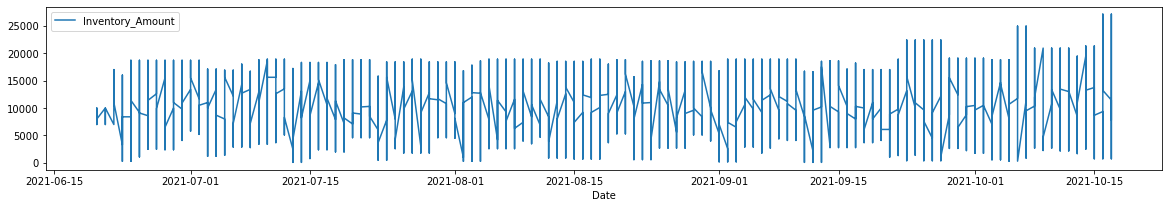

In [198]:
Inventory.plot(figsize=(20,3),x='Date',y='Inventory_Amount' )

<AxesSubplot:xlabel='Date'>

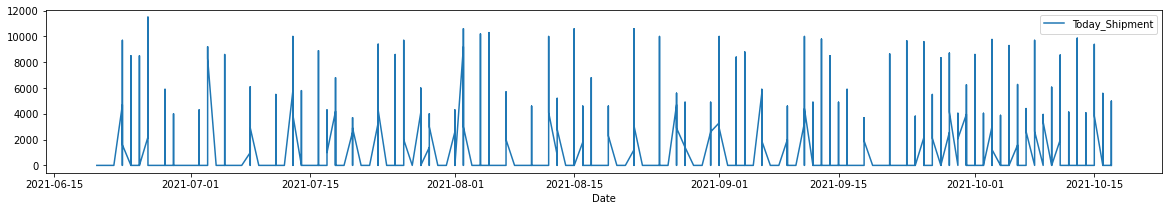

In [199]:
Inventory.plot(figsize=(20,3),x='Date',y='Today_Shipment' )

In [185]:
domo = Domo('7a30af47-482d-4600-8da7-328da88ff976','b0a537d63cf346d2e8d01e802ad4989c8b7b423012b98cb9dc5c259c41d78c45',api_host='api.domo.com')

In [186]:
#発注のデータセットを作成
#car_ds = domo.ds_create(Order,'SCDOS | Order','Python | test')
#受注のデータセットを作成
#car_ds = domo.ds_create(Order_Received,'SCDOS | Order_Received','Python | test')
#入荷のデータセットを作成
#car_ds = domo.ds_create(Arrival,'SCDOS | Arrival','Python | test')
#出荷のデータセットを作成
#car_ds = domo.ds_create(Shipment,'SCDOS | Shipment','Python | test')
#在庫のデータセットを作成
#car_ds = domo.ds_create(Inventory,'SCDOS | Inventory','Python | test')
#安全在庫のデータセットを作成
#car_ds = domo.ds_create(Safety_Inventory,'SCDOS | Safety_Inventory','Python | test')
#Pickingのデータセットを作成
#car_ds = domo.ds_create(Picking,'SCDOS | Picking','Python | test')
#損益のデータセットを作成
#car_ds = domo.ds_create(Profit_Loss,'SCDOS | Profit_Loss','Python | test')
#Trackingのデータセットを作成
#car_ds = domo.ds_create(Tracking,'SCDOS | Tracking','Python | test')

In [200]:
car_update = domo.ds_update('04f60dd7-a884-4a90-855d-f13067540b9c',Order)
car_update = domo.ds_update('2870256a-c15e-466d-ac59-25f8b4515f34',Order_Received)
car_update = domo.ds_update('f37b1aee-f1bf-4951-9f6e-0ead7c14a714',Arrival)
car_update = domo.ds_update('3db5544d-ecaf-492c-a02d-3a42fa7ac050',Shipment)
car_update = domo.ds_update('ba86630f-a6d0-44f8-ae73-bb4d8549d973',Inventory)
car_update = domo.ds_update('b9764e31-339e-4c58-912a-1cbb873ffd9f',Safety_Inventory)
car_update = domo.ds_update('875b8f7f-689e-46bc-b5bd-7fe334efbaa7',Picking)
car_update = domo.ds_update('ff02deac-974d-4dbd-9d76-d233c87d03c4',Profit_Loss)
car_update = domo.ds_update('07c1c00e-6050-422f-ae45-a89dd6acfc13',Tracking)

Schema Updated
